In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ai_vs_human_dataset_medium.csv to ai_vs_human_dataset_medium.csv


In [ ]:
import pandas as pd #open the file
df = pd.read_csv("ai_vs_human_dataset_medium.csv")
df.head()

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,12/19/2023 11:21,0.045,personal_tone
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,4/1/2024 17:43,0.007,NaN
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,8/28/2025 7:56,0.163,personal_tone
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,10/23/2023 14:34,0.122,NaN
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,11/28/2024 11:31,0.105,NaN


In [ ]:
#understand the column What column has the label?(AI or human)Are there missing values?
df.info()
df.isnull().sum()
df['label'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


,count
label,
ai,251
human,249


After running the cell, a 'Choose Files' button will appear. Click it to select the file(s) you want to upload. Once uploaded, the files will be accessible in the Colab environment.

In [ ]:
#clean data lowercase the data rmove numbers ,white spaces, url
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes,clean_text
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,12/19/2023 11:21,0.045,personal_tone,as someone who follows food i believe privacy ...
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,4/1/2024 17:43,0.007,NaN,analysis indicates that travel is associated w...
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,8/28/2025 7:56,0.163,personal_tone,i recently experienced education in my daytoda...
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,10/23/2023 14:34,0.122,NaN,analysis indicates that sports is associated w...
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,11/28/2024 11:31,0.105,NaN,in my experience finance often leads to users ...


In [ ]:
def get_default_numeric_features(text):
    # Calculate basic text features
    length_chars = len(text)
    length_words = len(text.split())

    # Placeholder values for quality_score, sentiment, and plagiarism_score
    # In a real application, these would be calculated using appropriate models/APIs
    quality_score = 0.5  # Example placeholder
    sentiment = 0.0      # Example placeholder (neutral sentiment)
    plagiarism_score = 0.0 # Example placeholder

    return {
        "length_chars": length_chars,
        "length_words": length_words,
        "quality_score": quality_score,
        "sentiment": sentiment,
        "plagiarism_score": plagiarism_score
    }

In [ ]:
#chech accuracy
model.score(X_test, y_test)

1.0

Accuracy: 1.0
              precision    recall  f1-score   support

          ai       1.00      1.00      1.00        55
       human       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



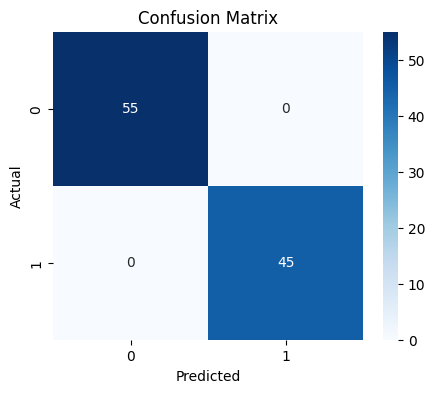

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_text(text):
    cleaned = clean_text(text)
    text_vec = vectorizer.transform([cleaned])

    num = get_default_numeric_features(text)
    num_array = [[
        num['length_chars'],
        num['length_words'],
        num['quality_score'],
        num['sentiment'],
        num['plagiarism_score']
    ]]

    num_sparse = csr_matrix(num_array)
    final_input = hstack([text_vec, num_sparse])

    pred = model.predict(final_input)[0]
    return "AI" if pred == 'ai' else "Human"
predict_text("Artificial intelligence is transforming healthcare and education.")

'AI'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack # Import hstack and csr_matrix

# Clean column first
df['clean_text'] = df['text'].fillna('').astype(str)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['clean_text']) # Renamed X to X_tfidf for clarity

# Extract numeric features for the entire dataset
numeric_features_list = []
for original_text in df['text']: # Use original text for numeric feature extraction
    numeric_features_list.append(get_default_numeric_features(original_text))

numeric_df = pd.DataFrame(numeric_features_list)
X_numeric = csr_matrix(numeric_df.values)

# Combine TF-IDF features and numeric features
X = hstack([X_tfidf, X_numeric]) # This will be the new X with 126 + 5 = 131 features
y = df['label']

print("Combined features shape:", X.shape)
print("Labels shape:", y.shape)

Combined features shape: (500, 131)
Labels shape: (500,)


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict
df['prediction'] = model.predict(X)

# Map numeric labels to text
df['prediction_label'] = df['prediction'].map({
    0: 'Human',
    1: 'AI'
})

# Save for dashboard
df.to_csv("ai_vs_human_dashboard.csv", index=False)